# LAB 2 - CLASSIFICATION

## Logistic Regression
A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

where
$g(z) = \frac{1}{1+e^{-z}}$

Recall that for logistic regression, the model is represented as

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) $$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.

Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    g = 1 / (1 + np.exp(-z))

    return g

### Loss Function
  
*  **Loss** is a measure of the difference of a single example to its target value.
*  **Cost** is a measure of the losses over the training set.


This is defined:
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(\color{red}{0}) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - \color{red}{0}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(\color{red}{1}) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - \color{red}{1}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

### Cost Function

Recall that for logistic regression, the **cost** function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where $m$ is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$

In [ ]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape

    # Compute the linear combination of weights and features
    z = np.dot(X,w) + b

    # Compute the sigmoid function
    f_wb = sigmoid(z)

    # Compute the cost function
    total_cost = (1/m) * np.sum(-y*np.log(f_wb) - (1-y)*np.log(1-f_wb))

    return total_cost

### Gradient

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously.

$\frac{\partial J(\mathbf{w},b)}{\partial w}$ and $\frac{\partial J(\mathbf{w},b)}{\partial b}$ are defined as:

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

$m$ is the number of training examples in the dataset, $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

In [ ]:
def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        # Compute the model's predicted output
        f_wb_i = sigmoid(np.dot(X[i], w) + b)

        # Compute the error
        err_i = f_wb_i - y[i]

        # Accumulate the gradient for weights
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]

        # Accumulate the gradient for bias
        dj_db += err_i

    # Average the gradients over all examples
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

### Batch Gradient Descent

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

### Ex-1: w/o SKLEARN

X=(100, 2) and y=(100,) 

Gradient Descent is working! 
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
w=[0.07125355 0.06482888], b=-8.189, Final Cost=0.302


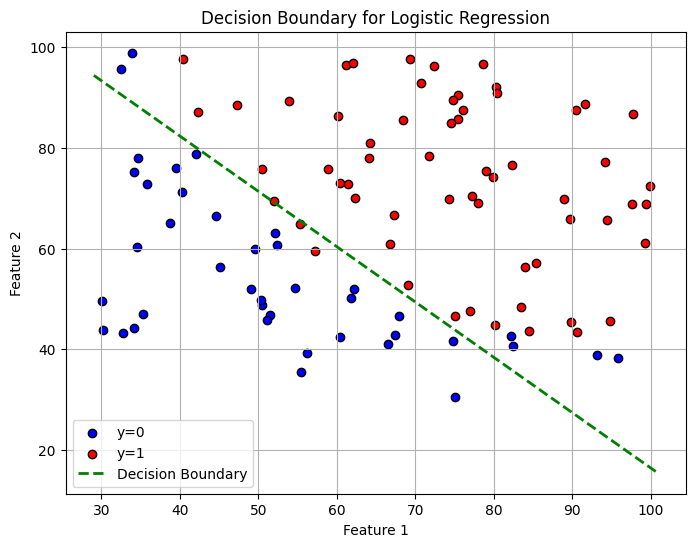

Train Accuracy: 92.000
Predictions exported as predictions.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1 / (1 + np.exp(-z))


    return g

def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape

    # Compute the linear combination of weights and features
    z = np.dot(X,w) + b

    # Compute the sigmoid function
    f_wb = sigmoid(z)

    # Compute the cost function
    total_cost = (1/m) * np.sum(-y*np.log(f_wb) - (1-y)*np.log(1-f_wb))

    return total_cost

def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        # Compute the model's predicted output
        f_wb_i = sigmoid(np.dot(X[i], w) + b)

        # Compute the error
        err_i = f_wb_i - y[i]

        # Accumulate the gradient for weights
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]

        # Accumulate the gradient for bias
        dj_db += err_i

    # Average the gradients over all examples
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        # Compute linear combination z_wb
        z_wb = np.dot(X[i], w) + b

        # Compute sigmoid function f_wb
        f_wb = sigmoid(z_wb)

        # Apply threshold: if f_wb >= 0.5, predict 1, else predict 0
        p[i] = 1 if f_wb >= 0.5 else 0

    return p

##############################
###### MAIN STARTS HERE ######
##############################

import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/ex2data1.txt"  # Define the file path

# Read the file as a CSV (assuming it's comma-separated)
df = pd.read_csv(file_path, header=None)  # If no headers, set header=None

# Display first few rows
df.head()

# Extract features (first two columns)
X_train = df.iloc[:, [0,1]].values  # Convert to NumPy array

# Extract target variable (last column)
y_train = df.iloc[:, -1].values   # Convert to NumPy array

print(f"X={X_train.shape} and y={y_train.shape} \n")

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

print("Gradient Descent is working! ")
# Call the batch gradient descent
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

# Print the final results
print(f"w={w}, b={b:.3f}, Final Cost={J_history[-1]:.3f}")

# Scatter plot of data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='y=0', edgecolors='k')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='y=1', edgecolors='k')

# Generate decision boundary points
predicted_x1 = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)  # Range of x1 values
predicted_x2 = np.zeros(predicted_x1.shape)

# w1*x1 + w2*x2 + b = 0 -> x2 = (-b - w1*x1) / w2
for i in range(len(predicted_x1)):  # Compute corresponding x2 values
  predicted_x2[i] = (-b - w[0] * predicted_x1[i]) / w[1]  # Decision boundary formula

# Plot decision boundary
plt.plot(predicted_x1, predicted_x2, 'g--', linewidth=2, label="Decision Boundary")

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary for Logistic Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Compute accuracy on our training set
# Acc. = # of Correct Prediction / # of Examples
p = predict(X_train, w,b)
print('Train Accuracy: %.3f'%(np.mean(p == y_train) * 100))

# Convert predictions array to DataFrame
df_predictions = pd.DataFrame(p, columns=["Predictions"])
df_y_train = pd.DataFrame(y_train, columns=["y_train"])

# Save as CSV file
df_predictions.to_csv("/content/predictions.csv", index=False)
df_y_train.to_csv("/content/ytrain.csv", index=False)
print("Predictions exported.")


## SCIKIT IMPLEMENTATION

### Ex-1: w/ SKLEARN

X=(100, 2) and y=(100,) 

Train Accuracy: 89.000%


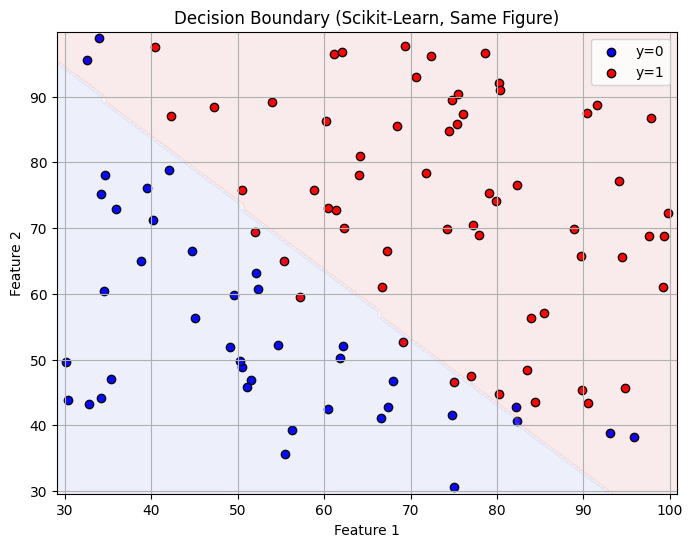

Predictions exported.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

##############################
###### MAIN STARTS HERE ######
##############################

# Load Data
file_path = "/content/ex2data1.txt"  # Define the file path

# Read the file as a CSV (assuming it's comma-separated)
df = pd.read_csv(file_path, header=None)  # If no headers, set header=None

# Extract features (first two columns)
X_train = df.iloc[:, [0,1]].values  # Convert to NumPy array

# Extract target variable (last column)
y_train = df.iloc[:, -1].values   # Convert to NumPy array

print(f"X={X_train.shape} and y={y_train.shape} \n")

# --- ✅ Train Logistic Regression using Scikit-Learn ---
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)

# Predict training accuracy
y_pred = model.predict(X_train)
accuracy = np.mean(y_pred == y_train) * 100
print(f'Train Accuracy: {accuracy:.3f}%')

# --- ✅ Create a single figure for both scatter plot & decision boundary ---
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of data points
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='y=0', edgecolors='k')
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='y=1', edgecolors='k')

# Overlay decision boundary using DecisionBoundaryDisplay in the SAME figure
DecisionBoundaryDisplay.from_estimator(
    model, X_train, response_method="predict",
    cmap=plt.cm.coolwarm, alpha=0.1, ax=ax  # Pass the same axis to overlay
)

# Labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundary (Scikit-Learn, Same Figure)")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

# --- ✅ Export Predictions ---
df_predictions = pd.DataFrame(y_pred, columns=["Predictions"])
df_y_train = pd.DataFrame(y_train, columns=["y_train"])

# Save as CSV file
df_predictions.to_csv("/content/predictions.csv", index=False)
df_y_train.to_csv("/content/ytrain.csv", index=False)
print("Predictions exported.")



## Regularized Logistic Regression

X=(118, 2) and y=(118,) 



Text(0.5, 0, 'Microchip Test 1')

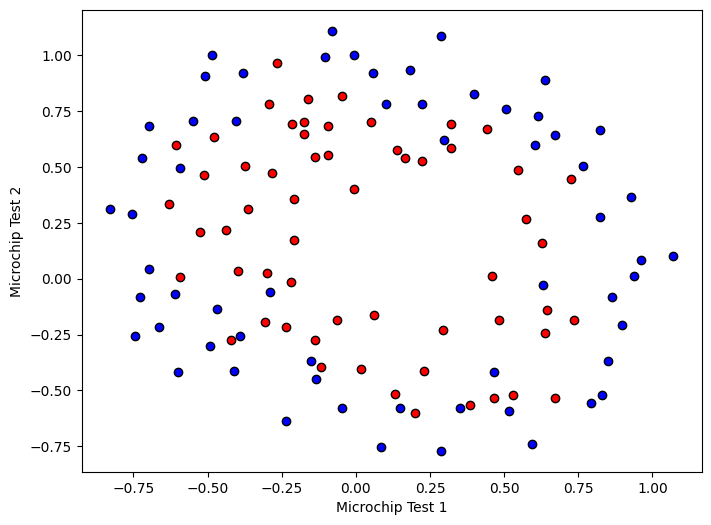

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/content/ex2data2.txt"  # Define the file path

# Read the file as a CSV (assuming it's comma-separated)
df = pd.read_csv(file_path, header=None)  # If no headers, set header=None

# Display first few rows
df.head()

# Extract features (first two columns)
X_train = df.iloc[:, [0,1]].values  # Convert to NumPy array

# Extract target variable (last column)
y_train = df.iloc[:, -1].values   # Convert to NumPy array

print(f"X={X_train.shape} and y={y_train.shape} \n")

# Scatter plot of data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='y=0', edgecolors='k')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='y=1', edgecolors='k')
# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')


### Feature Mapping

Feature mapping is a technique used in data analysis and machine learning to transform input data from a lower-dimensional space to a higher-dimensional space, where it can be more easily analyzed or classified.

In the below function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\Phi(x) =
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.


$$
\Phi(X_1, X_2) =
\begin{bmatrix}
1 \\
X_1 \\
X_2 \\
X_1^2 \\
X_1 X_2 \\
X_2^2 \\
X_1^3 \\
X_1^2 X_2 \\
X_1 X_2^2 \\
X_2^3 \\
\vdots \\
X_1^d \\
X_1^{d-1} X_2 \\
X_1^{d-2} X_2^2 \\
\vdots \\
X_1 X_2^{d-1} \\
X_2^d
\end{bmatrix}
$$

$$ X_1^i X_2^j, \quad \text{where } \quad i + j \leq d, \quad i, j \geq 0 $$

Total number of mapped features is: $$\frac{(d+1)(d+2)}{2}$$



In [ ]:
def map_feature(X1, X2, degree=6):
    """
    Feature mapping function to polynomial features up to the specified degree.

    Args:
      X1 : (ndarray Shape (m,)) Feature 1 (x1)
      X2 : (ndarray Shape (m,)) Feature 2 (x2)
      degree : (int) The polynomial degree up to which terms are generated.

    Returns:
      mapped_features : (ndarray Shape (m, new_features)) The transformed feature matrix.
    """

    m = X1.shape[0]  # Number of examples
    mapped_features = np.ones((m, 1))  # Initialize with bias term (column of ones)

    # Generate polynomial features up to 'degree'
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_feature = (X1 ** (i - j)) * (X2 ** j)  # Compute x1^(i-j) * x2^j
            mapped_features = np.hstack((mapped_features, new_feature.reshape(m, 1)))

    return mapped_features

In [ ]:
# Example dataset
X1 = np.array([2, 3, 4])  # Feature 1
X2 = np.array([5, 6, 7])  # Feature 2

# Generate polynomial features
X_mapped = map_feature(X1, X2, degree=6)

print("Mapped Feature Matrix Shape:", X_mapped.shape)  # Should be (3, 28)
print("Mapped Features:\n", X_mapped)

Mapped Feature Matrix Shape: (3, 28)
Mapped Features:
 [[1.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00 1.00000e+01 2.50000e+01
  8.00000e+00 2.00000e+01 5.00000e+01 1.25000e+02 1.60000e+01 4.00000e+01
  1.00000e+02 2.50000e+02 6.25000e+02 3.20000e+01 8.00000e+01 2.00000e+02
  5.00000e+02 1.25000e+03 3.12500e+03 6.40000e+01 1.60000e+02 4.00000e+02
  1.00000e+03 2.50000e+03 6.25000e+03 1.56250e+04]
 [1.00000e+00 3.00000e+00 6.00000e+00 9.00000e+00 1.80000e+01 3.60000e+01
  2.70000e+01 5.40000e+01 1.08000e+02 2.16000e+02 8.10000e+01 1.62000e+02
  3.24000e+02 6.48000e+02 1.29600e+03 2.43000e+02 4.86000e+02 9.72000e+02
  1.94400e+03 3.88800e+03 7.77600e+03 7.29000e+02 1.45800e+03 2.91600e+03
  5.83200e+03 1.16640e+04 2.33280e+04 4.66560e+04]
 [1.00000e+00 4.00000e+00 7.00000e+00 1.60000e+01 2.80000e+01 4.90000e+01
  6.40000e+01 1.12000e+02 1.96000e+02 3.43000e+02 2.56000e+02 4.48000e+02
  7.84000e+02 1.37200e+03 2.40100e+03 1.02400e+03 1.79200e+03 3.13600e+03
  5.48800e+03 9.60400e+03 1.6

In [ ]:
# Map X_train
mapped_X =  map_feature(X_train[:, 0], X_train[:, 1], degree=6)
print("Shape after feature mapping:", mapped_X.shape)

Shape after feature mapping: (118, 28)


### Cost Function
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \color{red}{\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$

Compare this to the cost function without regularization:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is $$\color{red}{\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2}$$

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar

    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

### Gradient

The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization, which is of the form
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$





In [ ]:
def compute_gradient_reg(X, y, w, b, lambda_=1):
    """
    Computes the gradient for logistic regression with regularization.

    Args:
      X : (ndarray Shape (m,n))  Data, m examples by n features.
      y : (ndarray Shape (m,))   Target values (0 or 1).
      w : (ndarray Shape (n,))   Model parameters (weights).
      b : (scalar)               Bias parameter of the model.
      lambda_ : (scalar, float)  Regularization constant.

    Returns:
      dj_db : (scalar)             The gradient of the cost w.r.t. the bias b.
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the weights w.
    """

    m, n = X.shape  # Number of training examples and features

    # Compute unregularized gradients using the standard compute_gradient function
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###
    # Add regularization term to the gradient of the weights (but not bias)
    dj_dw += (lambda_ / m) * w  # Regularization term
    ### END CODE HERE ###

    return dj_db, dj_dw

### Ex-1: w/o SKLEARN

X=(118, 2) and y=(118,) 

Shape after feature mapping: (118, 28)
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.60   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.44   
Train Accuracy: 83.898305


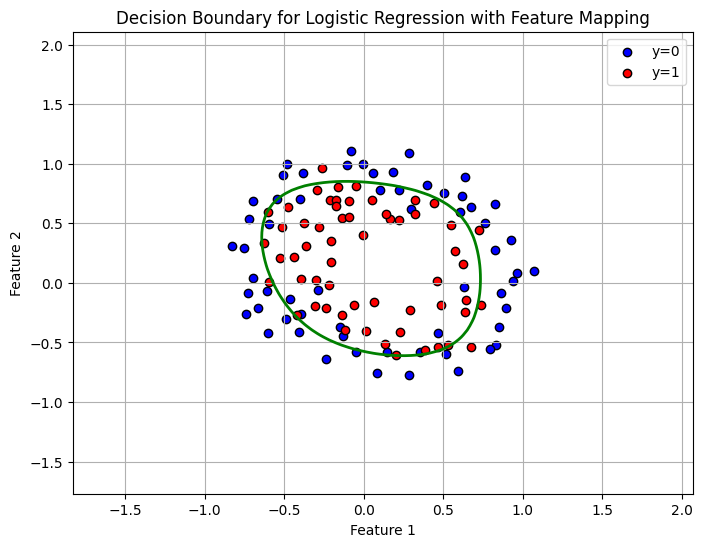

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute gradient for logistic regression
def compute_gradient(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * X[i]
        dj_db += err_i

    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

# Feature mapping function
def map_feature(X1, X2, degree=6):
    m = X1.shape[0]
    mapped_features = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_feature = (X1 ** (i - j)) * (X2 ** j)
            mapped_features = np.hstack((mapped_features, new_feature.reshape(m, 1)))
    return mapped_features

# Compute cost with regularization
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m

    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)

    return cost + reg_cost

# Compute gradient with regularization
def compute_gradient_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    dj_dw += (lambda_ / m) * w  # Regularization term
    return dj_db, dj_dw

# Gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        if i < 100000:  # Prevent resource exhaustion
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history

# Prediction function
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb >= 0.5 else 0
    return p

# Decision Boundary Plot
def plot_decision_boundary(w, b, X, y, degree=6):
    """
    Plots the decision boundary for logistic regression with feature mapping.

    Args:
      w : (ndarray) Trained weights.
      b : (scalar)  Trained bias.
      X : (ndarray) Original feature matrix before mapping.
      y : (ndarray) Target labels.
      degree : (int) Polynomial degree used for feature mapping.
    """

    # Scatter plot of data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='y=0', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='y=1', edgecolors='k')

    # Create grid of values covering feature space
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                           np.linspace(x2_min, x2_max, 100))

    # Map features for all points in the grid
    grid_mapped = map_feature(xx1.ravel(), xx2.ravel(), degree)

    # Compute predictions for each point in the grid
    z = np.dot(grid_mapped, w) + b
    predictions = sigmoid(z).reshape(xx1.shape)

    # Plot decision boundary where prediction = 0.5
    decision_boundary = plt.contour(xx1, xx2, predictions, levels=[0.5], colors='green', linewidths=2, linestyles="solid")

    # Labels and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary for Logistic Regression with Feature Mapping")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

##############################
###### MAIN STARTS HERE ######
##############################

file_path = "/content/ex2data2.txt"

# Load data
df = pd.read_csv(file_path, header=None)
X_train = df.iloc[:, [0, 1]].values
y_train = df.iloc[:, -1].values

print(f"X={X_train.shape} and y={y_train.shape} \n")

# Map features
mapped_X = map_feature(X_train[:, 0], X_train[:, 1], degree=6)
print("Shape after feature mapping:", mapped_X.shape)

# Initialize parameters
np.random.seed(1)
initial_w = np.random.rand(mapped_X.shape[1]) - 0.5
initial_b = 1

# Set regularization parameter
lambda_ = 0.01

# Compute cost and gradient before optimization
cost = compute_cost_logistic_reg(mapped_X, y_train, initial_w, initial_b, lambda_)
dj_db, dj_dw = compute_gradient_reg(mapped_X, y_train, initial_w, initial_b, lambda_)

# Run gradient descent
iterations = 10000
alpha = 0.01

w, b, J_history, _ = gradient_descent(mapped_X, y_train, initial_w, initial_b,
                                      compute_cost_logistic_reg, compute_gradient_reg,
                                      alpha, iterations, lambda_)

# Compute accuracy on the training set
p = predict(mapped_X, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

# Call the function to plot the decision boundary
plot_decision_boundary(w, b, X_train, y_train, degree=6)

### Ex-2: w/ SKLEARN

X=(118, 2) and y=(118,) 

Shape after feature mapping: (118, 28)
Train Accuracy: 83.90%


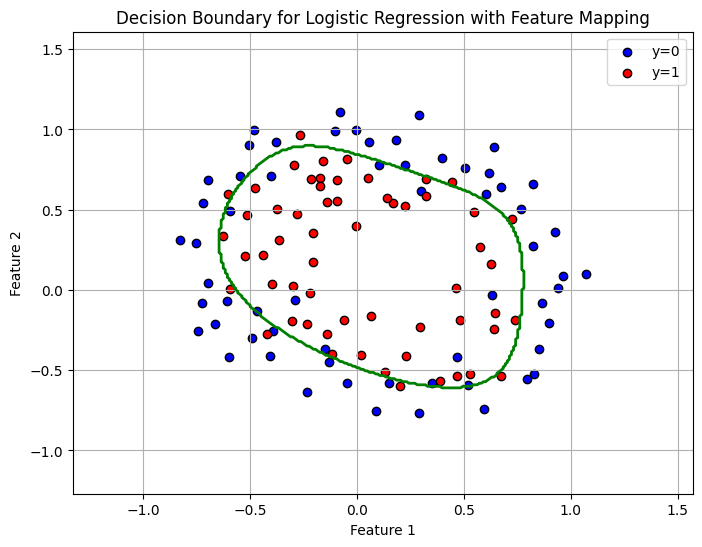

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Feature mapping function (same as before)
def map_feature(X1, X2, degree=6):
    m = X1.shape[0]
    mapped_features = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_feature = (X1 ** (i - j)) * (X2 ** j)
            mapped_features = np.hstack((mapped_features, new_feature.reshape(m, 1)))
    return mapped_features

##############################
###### MAIN STARTS HERE ######
##############################

# Load data
file_path = "/content/ex2data2.txt"
df = pd.read_csv(file_path, header=None)
X_train = df.iloc[:, [0, 1]].values  # Original 2D feature space
y_train = df.iloc[:, -1].values  # Labels

print(f"X={X_train.shape} and y={y_train.shape} \n")

# Map features for polynomial terms
mapped_X = map_feature(X_train[:, 0], X_train[:, 1], degree=6)  # Mapped feature space (28D)
print("Shape after feature mapping:", mapped_X.shape)

# Train Logistic Regression Model using Scikit-Learn
model = LogisticRegression(max_iter=10000, C=1/0.01)  # Regularization strength 1/lambda_
model.fit(mapped_X, y_train)

# Predict training accuracy
y_pred = model.predict(mapped_X)
accuracy = np.mean(y_pred == y_train) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

# --- ✅ PLOT TRANSPARENT DECISION BOUNDARY ---
plt.figure(figsize=(8, 6))

# Scatter plot of data points
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='y=0', edgecolors='k')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='y=1', edgecolors='k')

# Create a fine-mesh grid of values for the decision boundary
x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),  # Higher resolution grid
                        np.linspace(x2_min, x2_max, 300))

# Convert the mesh grid into a feature-mapped version
grid_features = map_feature(xx1.ravel(), xx2.ravel(), 6)  # (90000, 28)

# Compute model predictions for the grid
Z = model.predict(grid_features)
Z = Z.reshape(xx1.shape)

# Plot the decision boundary using contour (only contour line, no background coloring)
plt.contour(xx1, xx2, Z, levels=[0.5], colors='green', linewidths=2, linestyles="solid")

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary for Logistic Regression with Feature Mapping")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Regularized Linear Regression